# Acc 2 Stock Performance Tracker


## Setup


In [25]:
import contextlib

import pandas as pd

import const
import draw_utils
import process_utils

In [26]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [27]:
acc_name = const.ACC2_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [28]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [29]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


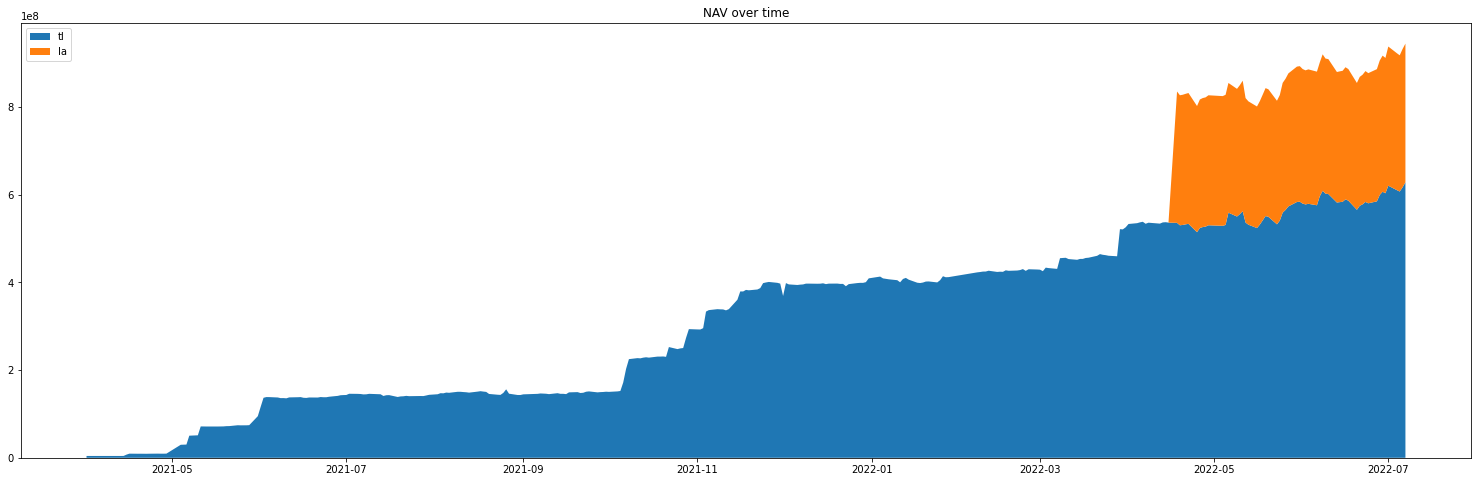

In [30]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


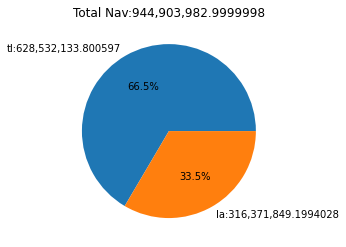

In [31]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


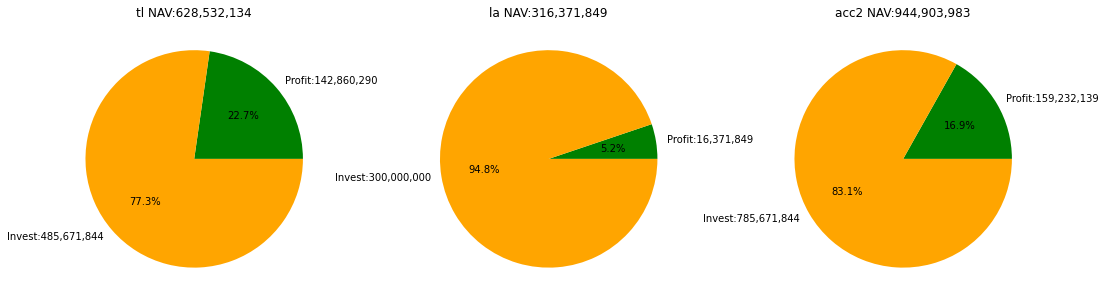

In [32]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


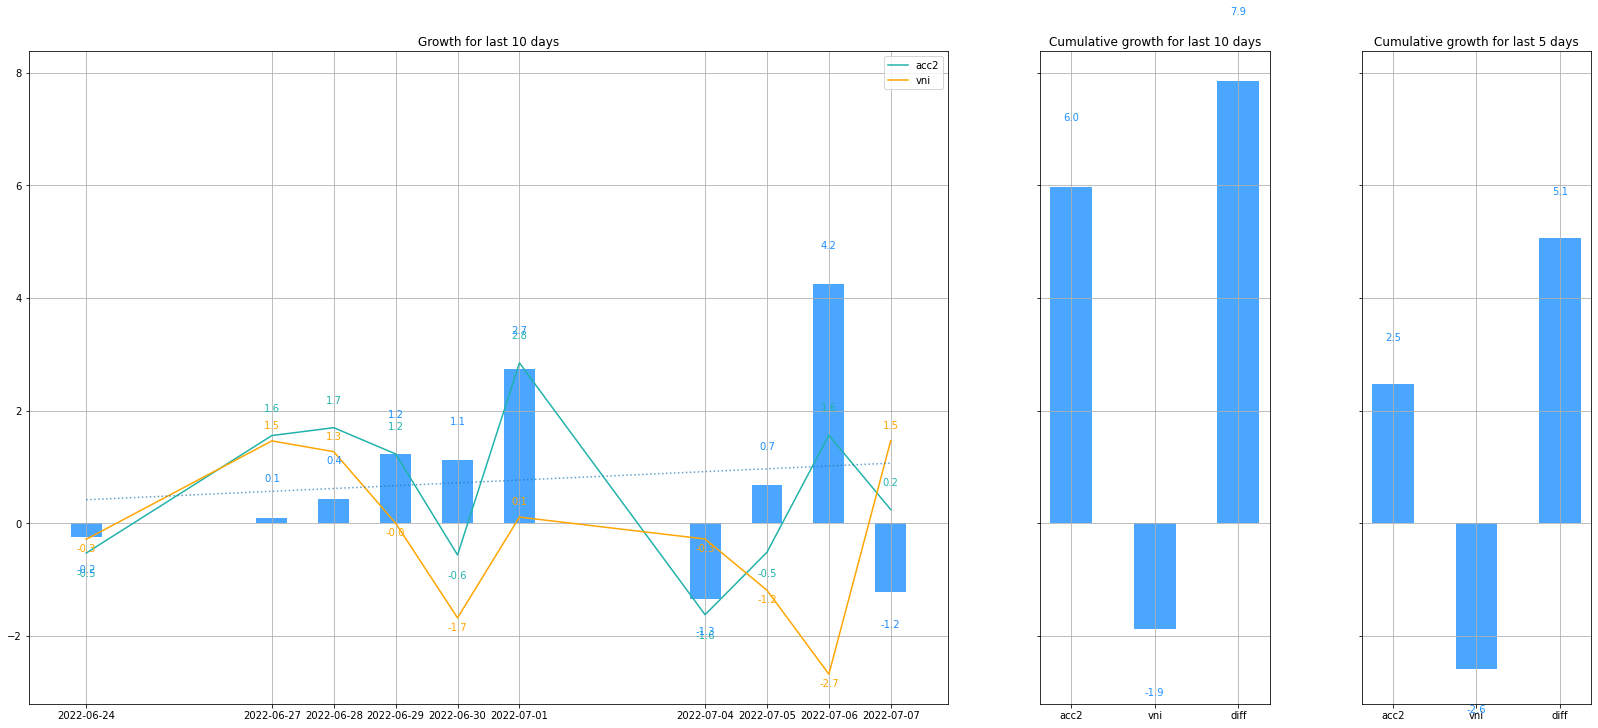

In [33]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [34]:
# user_df.tail(10)


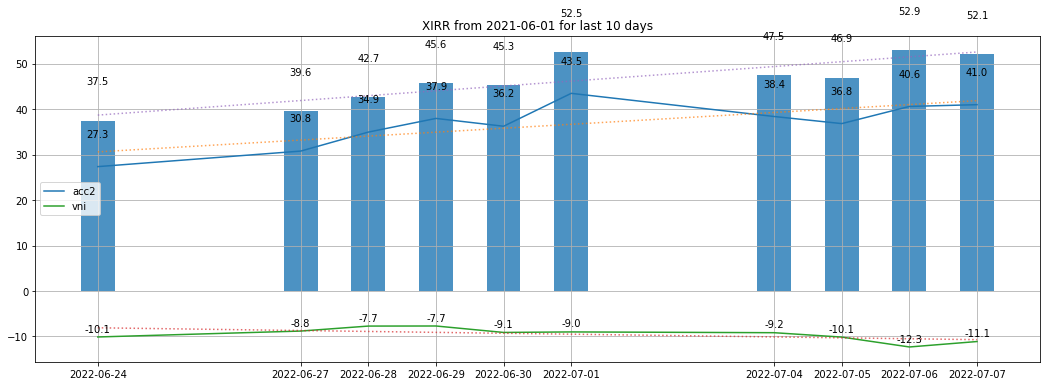

In [35]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


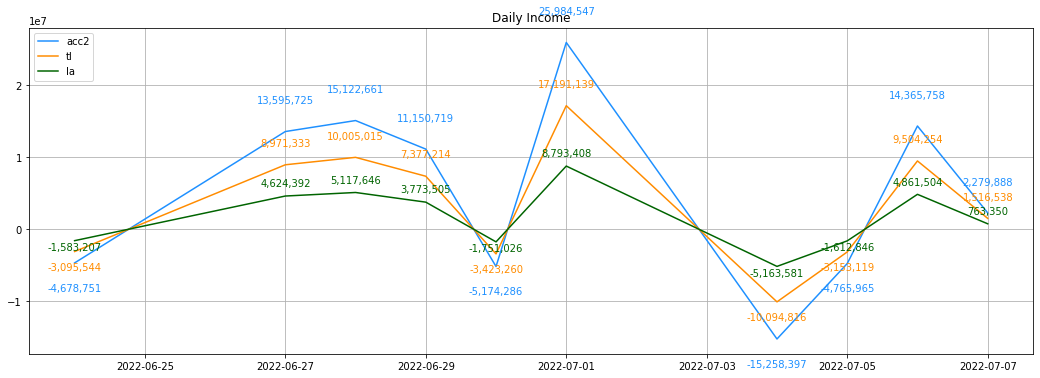

In [36]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


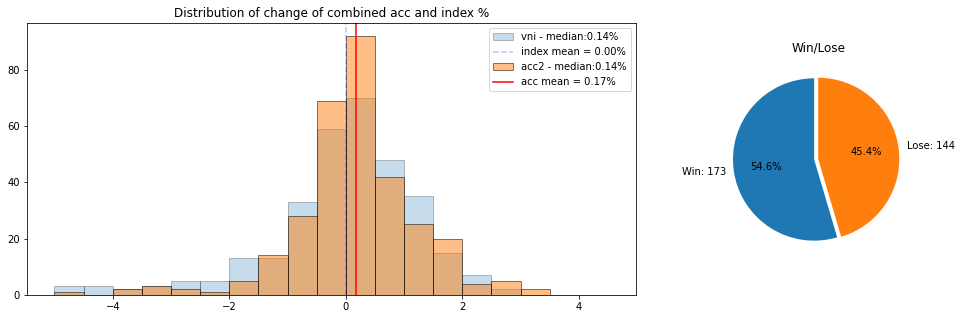

In [37]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [38]:
anchor_date = "2022-4-18"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


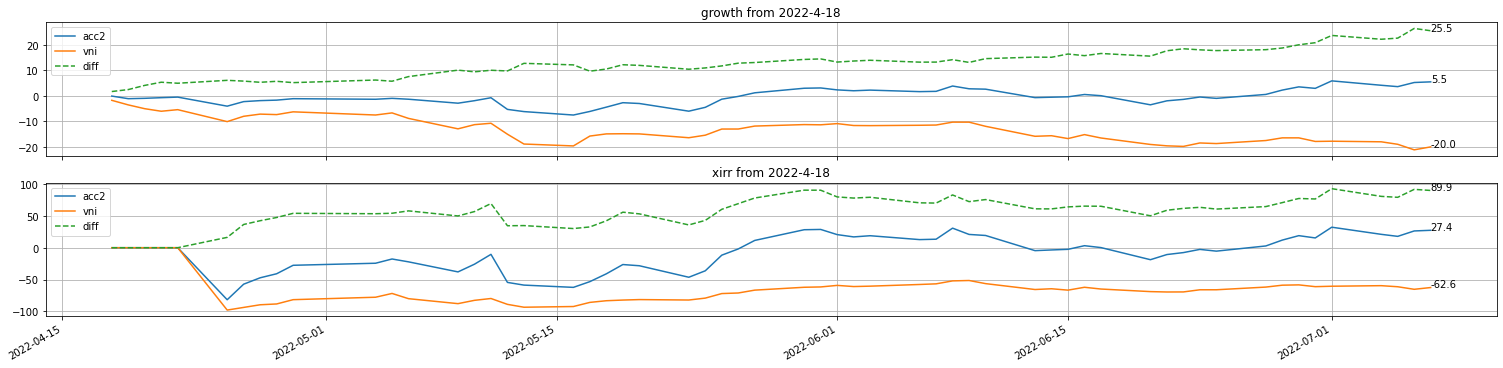

In [39]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [40]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


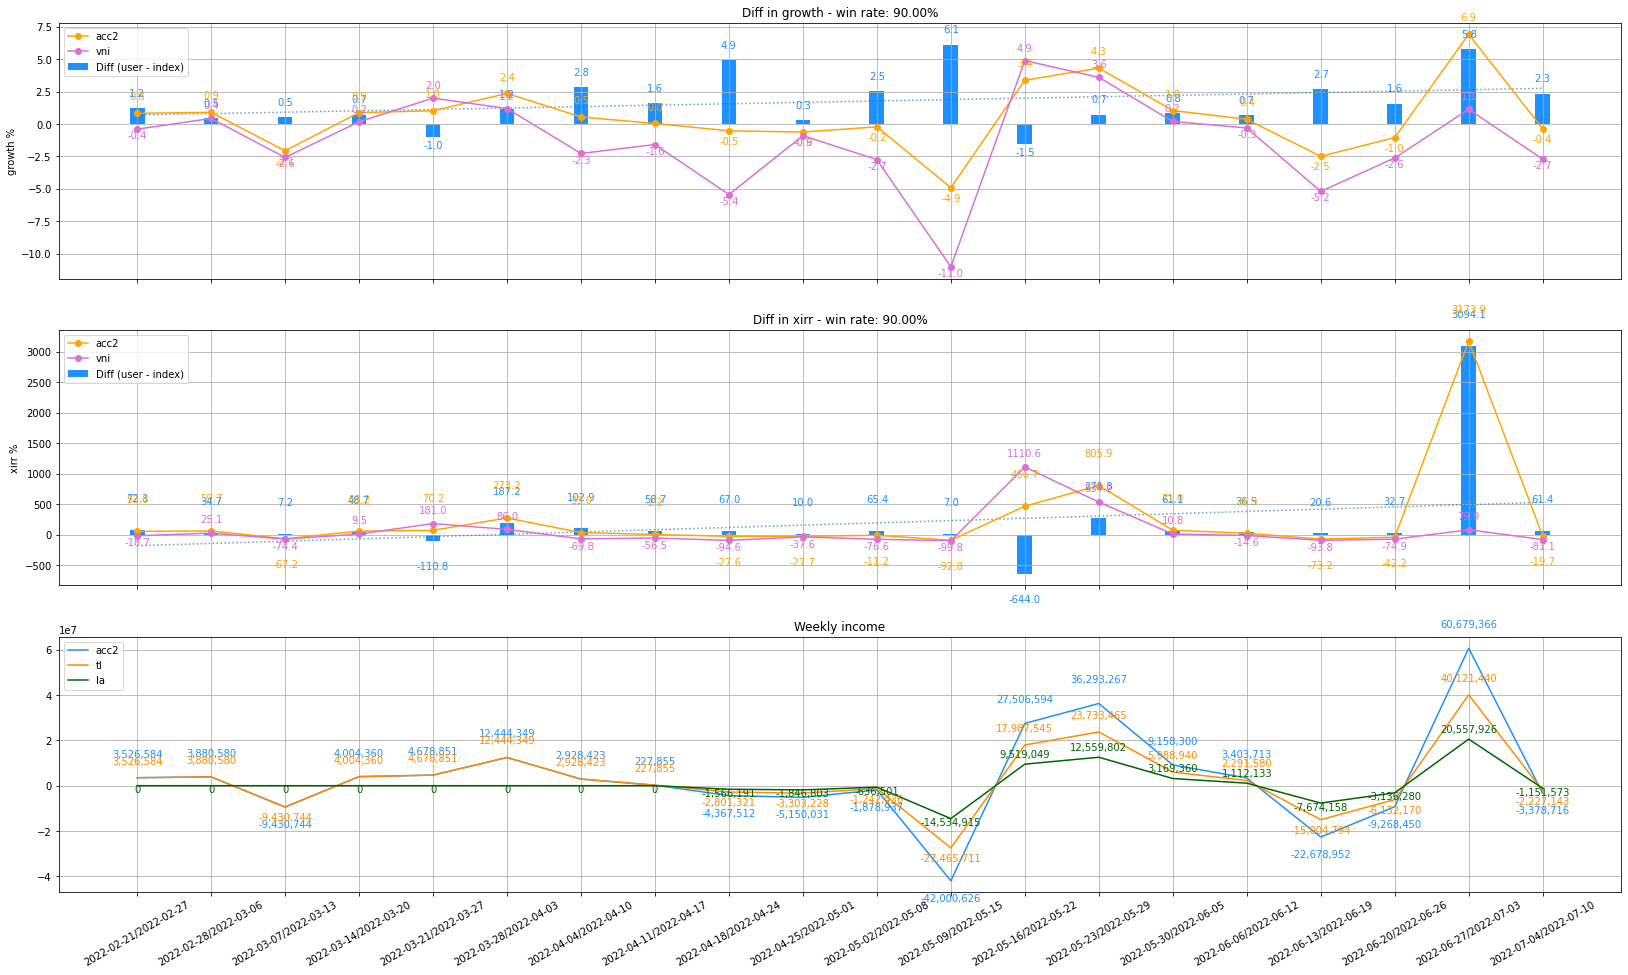

In [41]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


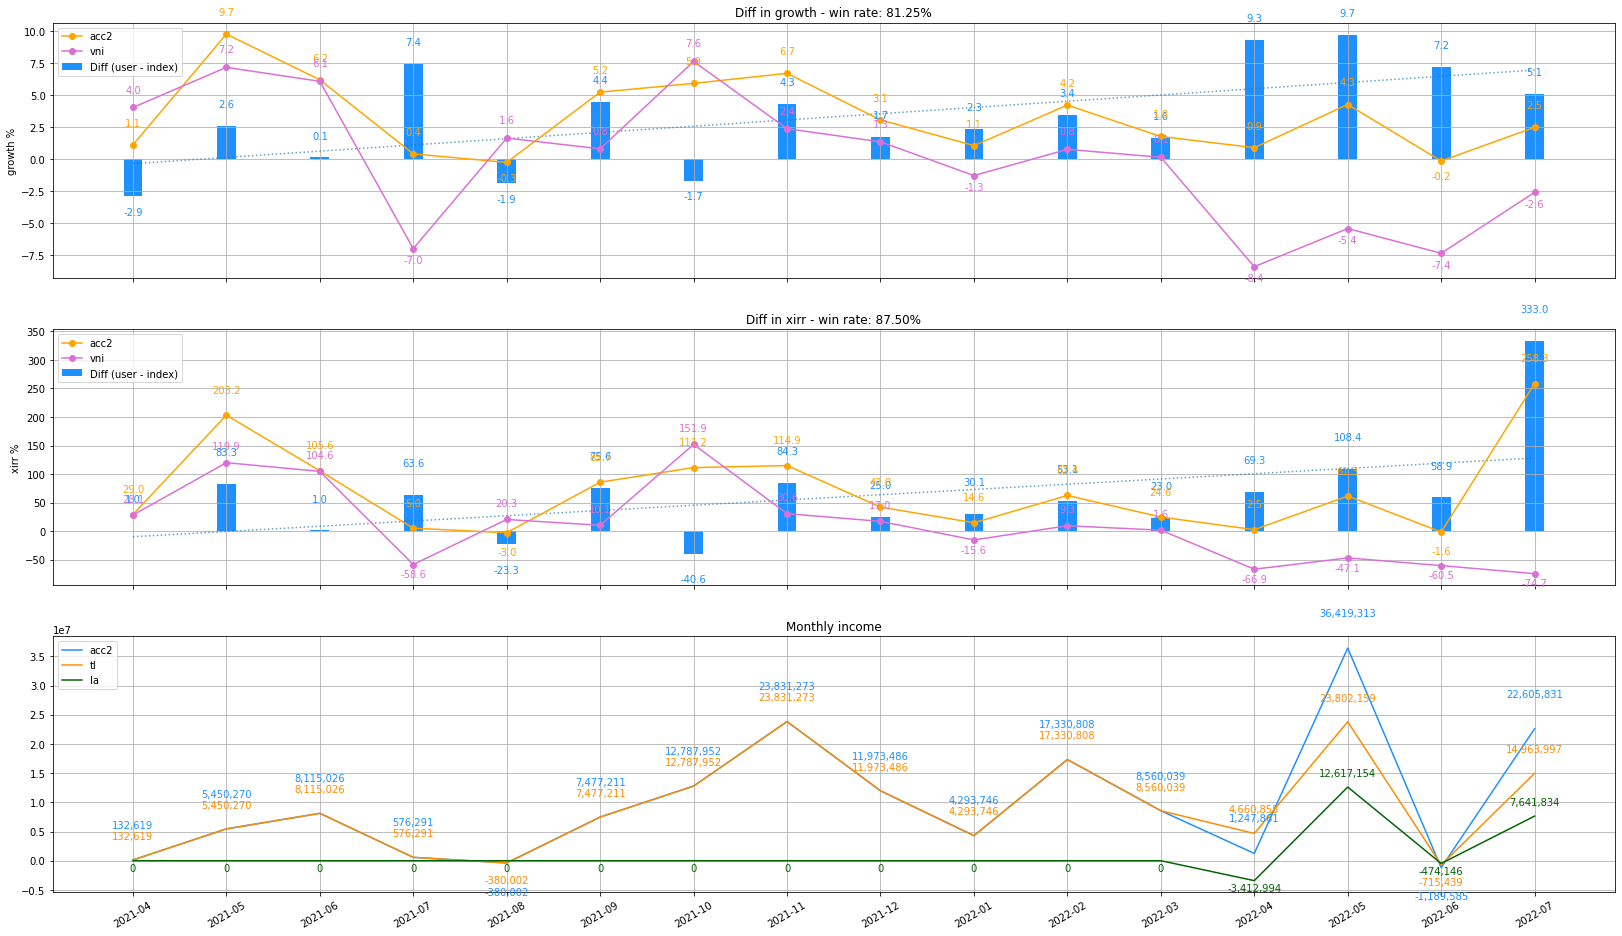

In [42]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


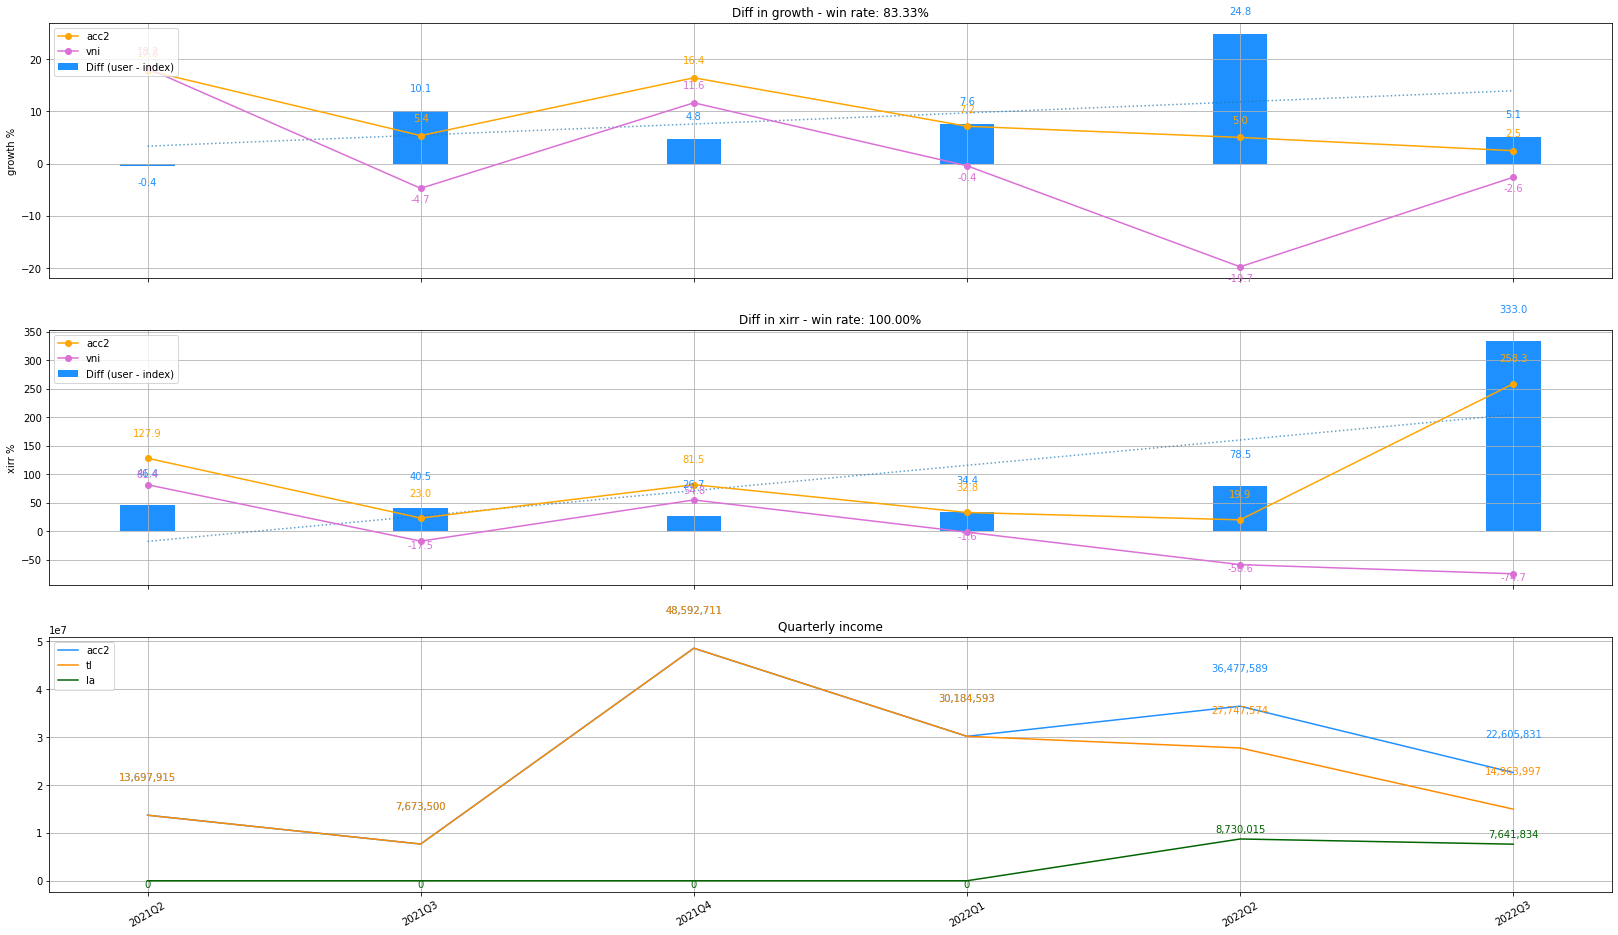

In [43]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


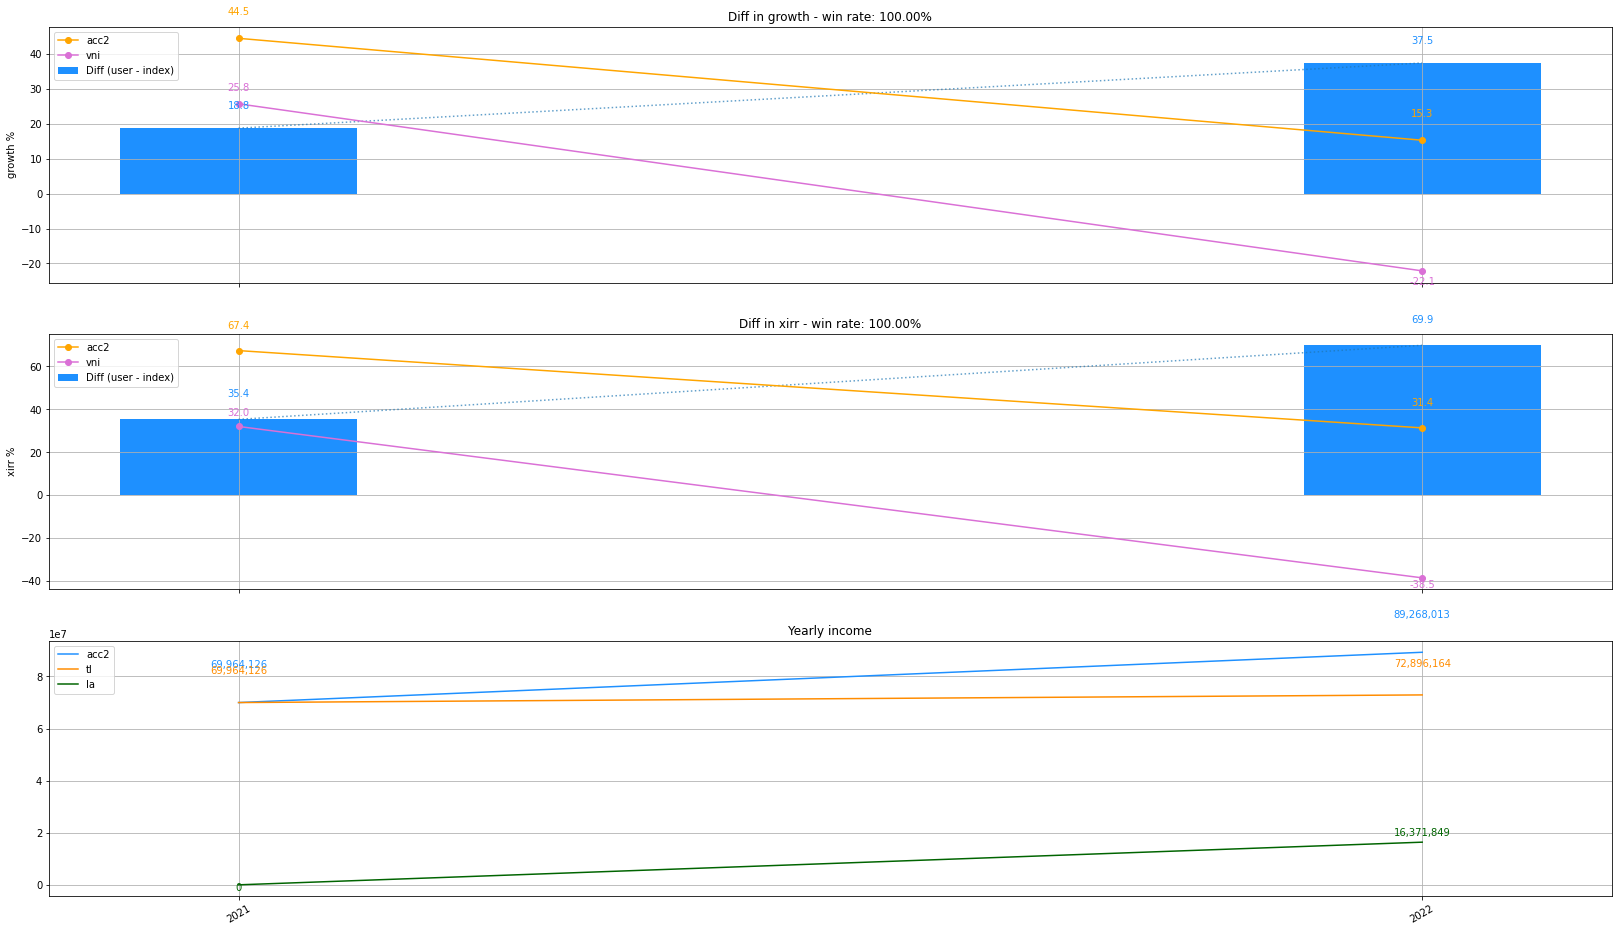

In [44]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)
